# 09-1. 순차 데이터와 순차 신경망(p.486)

## 순차 데이터
순서에 의미가 있는 데이터. 텍스트나 시계열 데이터 등. 순서를 유지하며 신경망에 주입해야 하며, 이전에 입력한 데이터를 기억하는 기능이 필요하다.

**피드포워드 신경망**: 입력 데이터의 흐름이 앞으로만 전달되는 신경망. 완전 연결 신경망, 합성곱 신경망이 이에 속함. 기억 장치가 없이, 하나의 샘플(또는 하나의 배치)을 사용하여 정방향 계산을 수행하고 나면, 그 샘플은 버려지고 다음 샘플을 처리할 때 재사용하지 않음.

**순환 신경망**: 신경망이 이전에 처리했던 샘플을 다음 샘플을 처리하는 데 재사용하기 위해서는, 이전 데이터가 신경망 층에 순환되어야 함.

## 순환 신경망

일반적인 완전 연결 신경망과 거의 비슷하나, 이전 데이터의 처리 흐름을 순환하는 고리 하나가 추가됨.

뉴런의 출력이 다시 자기 자신으로 전달됨 = 바로 이전 데이터를 재사용

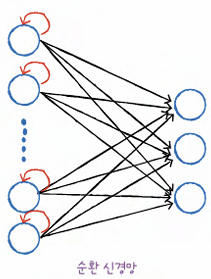

1. 샘플 A를 처리하고 난 출력 $O_{A}$가 다시 뉴런으로 들어감
2. 샘플 B를 처리할 때 $O_{A}$를 함께 사용 -> 출력 $O_{B}$
3. 샘플 C를 처리할 때 $O_{B}$를 함께 사용 -> 출력 $O_{C}$
- $O_{C}$에는 A, B에 대한 정보도 포함되어 있으며, B에 대한 정보가 더 많다.

이렇게 샘플을 처리하는 한 단계를 **타임스텝**이라고 한다.  
순환 신경망은 이전 타임스텝의 샘플을 기억하지만, 타입스템이 오래될수록 순환되는 정보는 희미해진다.

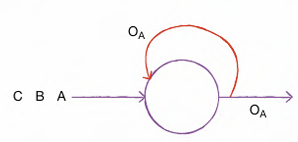

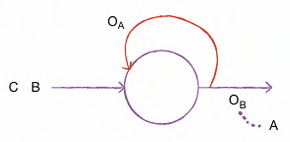

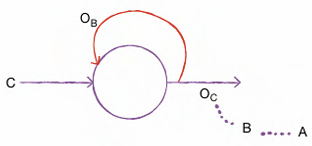

순환 신경망에서는 층을 **셀**이라고 부름. 한 셀에는 여러 개의 뉴런이 있지만, 뉴런을 모두 표시하지 않고 하나의 셀로 층을 표현함.  
셀의 출력을 **은닉 상태**라고 부름.

일반적으로 은닉층의 활성화 함수로는 하이퍼볼릭 탄젠트 함수인 $tanh^{2}$가 많이 사용됨. -1~1 사이의 범위를 가짐.

순환 신경망에서도 피드포워드 신경망과 같이 뉴런은 입력과 가중치를 곱하나, 순환 신경망의 뉴런은 가중치가 하나 더 있음  
: 이전 타입스텝의 은닉 상태에 곱해지는 가중치. 셀은 입력과 이전 타임스텝의 은닉 상태를 사용해 현재 타임스텝의 은닉 상태를 만듦.

$w_{x}$: 입력에 곱해지는 가중치  
$w_{h}$: 이전 타임스텝의 은닉 상태에 곱해지는 가중치
* 가중치 $w_{h}$는 타임스텝에 따라 변화되는 뉴런의 출력을 학습, 이는 순차 데이터를 다루는 데 필요.
* 타임스텝 1에서 사용되는 이전 은닉 상태 $h_{0}$은, 맨 처음 샘플을 입력할 떄는 이전 타임스텝이 없으므로 0으로 초기화.

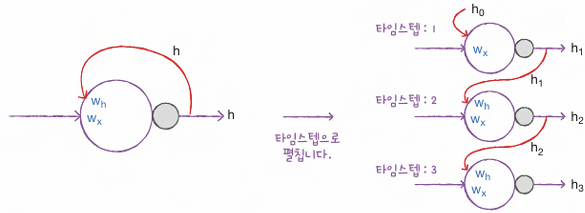

## 셀의 가중치와 입출력

순환층에 입력되는 특성 4개, 순환층의 뉴런 3개로 가정: 가중치 $w_{x}$의 크기는 4*3=12개.

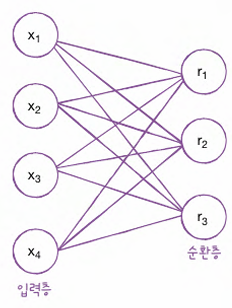

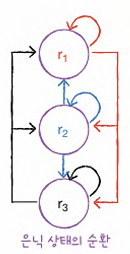


은닉 상태를 위한 가중치 $w_{b}$의 크기는, 3개*다른 3개 뉴런에 은닉 상태 모두 전달 = 9개.

모델 파라미터 개수: 가중치에 절편을 더함(뉴런마다 하나의 절편)  
즉, 모델 파라미터 수 = $w_{x} + w_{h} + 절편 = 12+9+3=24개$

**순환층의 입력과 출력**: 순환층은 샘플마다 2개의 차원을 가짐, 하나의 샘플을 하나의 시퀀스라고 함.

시퀀스의 길이가 타임스텝 길이가 됨.

하나의 샘플은 시퀀스 길이(단어 개수)와 단어 표현의 2차원 배열, 순환층을 통과하면 1차원 배열로 바뀜. 이 1차원 배열의 크기는 순환층의 뉴런 개수에 의해 결정.

순환층은 기본적으로 마지막 타임스텝의 은닉 상태만 출력으로 내보냄.

순환층을 여러 개 쌓으면, 마지막 셀에서는 마지막 타임스텝의 은닉 상태 $h_{f}$를, 마지막 셀을 제외한 모든 셀은 모든 타임스텝의 은닉 상태를 출력.

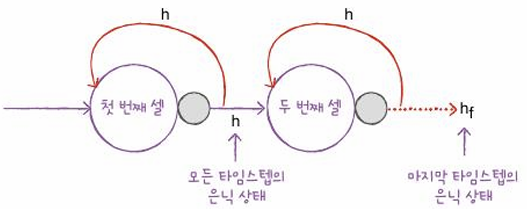

**출력층의 구성**: 마지막에 밀집층을 두어 클래스 분류(= 합성곱 신경망).
- 다중 분류일 경우: 출력층에 클래스 개수만큼 뉴런을 두고 소프트맥스 활성화 함수 사용
- 이진 분류일 경우: 하나의 뉴런을 두고 시그모이드 활성화 함수 사용

마지막 셀의 출력이 1차원이므로 Flatten 클래스로 펼칠 필요가 없다.

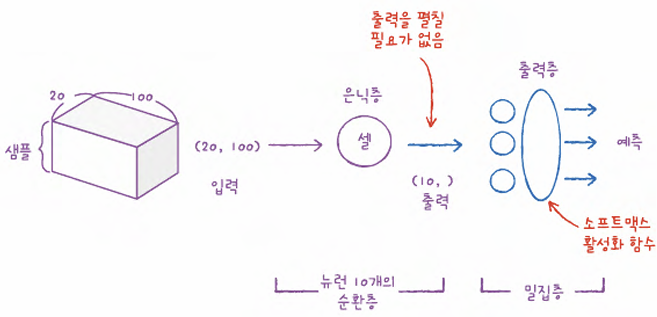

**사진 예시 설명**  

샘플은 20개의 타임스텝 * 100개의 표현 또는 특성.

순환층의 셀을 통과하면, 모든 타임스텝을 처리하고 난 후의 은닉 상태만 출력됨  
: 은닉 상태의 크기 = 셀에 있는 뉴런의 개수 -> (10,).

3개의 클래스를 가진 다중 분류: 출력층에 3개의 뉴런과 소프트맥스 활성화 함수 사용

# 09-2. 순환신경망으로 IMDB 리뷰 분류하기(p.500)

## IMDB 리뷰 데이터셋
- 영화 리뷰를 감상평에 따라 긍정과 부정으로 분류해 놓은 데이터셋. 총 50,000개의 샘플, 훈련/테스트 각각 25,000개씩.

- 말뭉치: 자연어 처리 분야에서 훈련데이터를 부르는 말.

- 텍스트 자체를 전달하는 것이 아닌, 단어마다 고유한 정수를 부여. 정숫값 자체는 의미나 크기가 관련 없음.

- 토큰: 분리된 단어. 일반적으로 영어 문장은 소문자로 바꾸고 구둣점을 삭제한 다음 공백 기준으로 분리. 한글은 형태소 분석으로 토큰을 만듦.

- 하나의 샘플은 여러 개의 토큰으로 이루어져 있고, 1개의 토큰이 하나의 타임스탬프에 해당.

- 토큰에 할당하는 정수 중 몇 개는 특정한 용도로 예약되어 있는 경우가 많음. 0은 패딩, 1은 문장의 시작, 2는 어휘 사전에 없는 토큰.

In [1]:
# 텐서플로에는 이미 영어 문장을 정수로 바꾼 IMDB 리뷰 데이터가 있음
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=200) # 자주 사용하는 단어 500개

In [2]:
print(train_input.shape, test_input.shape)
# 배열이 1차원: 리뷰 텍스트는 길이가 제각각이므로, 고정 크기의 2차원 배열에 담기보다는
# 리뷰마다 별도의 파이썬 리스트로 담아야 메모리를 효율적으로 사용할 수 있다.

(25000,) (25000,)


In [3]:
print(len(train_input[0]))

218


In [4]:
print(len(train_input[1]))

189


In [5]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 2, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 2, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 2, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 2, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 2, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 2, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 2, 92, 25, 104, 4, 2, 65, 16, 38, 2, 88, 12, 16, 2, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


어휘 사전에 500개의 단어만 들어가 있으므로(전체 어휘 사전에 있는 단어를 등장 횟수 순서대로 500개) 어휘 사전에 없는 단어는 모두 2로 표시됨.

In [6]:
# 리뷰의 긍부정을 판단=이진 분류 문제-> 타깃값이 0(부정)과 1(긍정)으로 나뉨
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [7]:
# 훈련, 검증 세트 분할
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [8]:
# 각 리뷰의 길이 계산해 넘파이 배열에 담기: 길이 확인 위함
import numpy as np

lengths = np.array([len(x) for x in train_input])

In [9]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


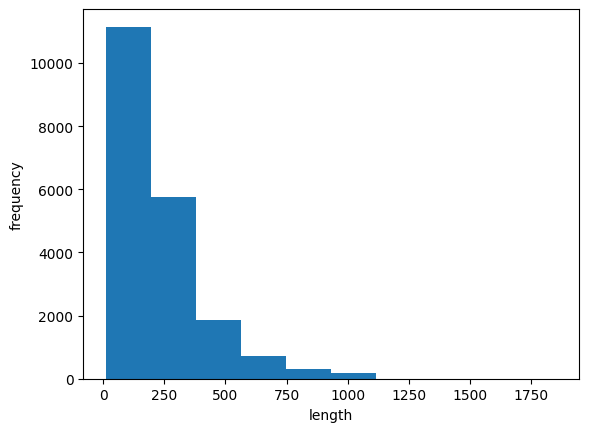

In [10]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [11]:
# 이 예제에서는 100개의 단어만 사용
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
# 리뷰 길이를 100에 맞추기 위해 패딩 필요, 보통 토큰으로는 0 사용
# pad_sequences() 함수로 훈련 세트의 리뷰를 순회하면서 길이가 100이 되도록 자르거나 0으로 패딩해 채움

In [12]:
print(train_seq.shape)
# 리스트 배열에서 2차원 배열이 됨

(20000, 100)


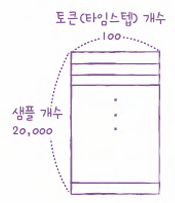

In [13]:
print(train_seq[0])

[ 10   4  20   9   2   2   2   5  45   6   2   2  33   2   8   2 142   2
   5   2  17  73  17   2   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12   2  69   2 142  73   2   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]


In [14]:
# 어디가 잘렸을까: 원본 샘플의 마지막 10개 토큰 출력-위와 같음, 앞부분이 잘림을 짐작 가능
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]


- pad_sequences() 함수는 기본으로 maxlen보다 긴 시퀀스의 앞부분을 자름: 시퀀스의 뒷부분 정보가 더 유용하리라 기대하기 때문.

- 뒷부분을 잘라내고 싶다면, pad_sequences() 함수의 truncating 매개변수의 값을 기본값 'pre'가 아닌 'post'로 바꿈

In [15]:
print(train_seq[5])
# 앞부분에 0이 있음: 이 샘플의 길이는 100보다 작았음.
# 위와 마찬가지로 패딩 토큰이 앞부분에 추가됨.

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2   2   2 183  10
  10  13  82  79   4   2  36  71   2   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14   2  56 129   2  10  10  21   2  94   2   2   2   2  11 190
  24   2   2   7  94   2   2  10  10  87   2  34  49   2   7   2   2   2
   2   2   2   2  46  48  64  18   4   2]


- 시퀀스의 마지막에 있는 단어가 셀의 은닉 상태에 가장 큰 영향을 미치므로, 마지막에 패딩 추가는 일반적으로 선호하지 않음.
- pad_sequences() 함수의 padding 매개변수의 기본값인 'pre'를 'post'로 바꾸면 뒷부분에 패딩 추가됨.

In [16]:
# 검증 세트 길이도 맞추기
val_seq = pad_sequences(val_input, maxlen=100)

## 순환 신경망 만들기

- 케라스가 제공하는 여러 순환층 클래스 중 간단한 SimpleRNN 클래스 사용

In [17]:
# Dense나 Conv2D 클래스 대신 SimpleRNN 클래스 사용
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.SimpleRNN(8, input_shape=(100, 200)))
model.add(keras.layers.Dense(1, activation='sigmoid')) # activation 매개변수의 기본값: 'tanh'

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


input_shape=(100, 500)인 이유
- 100: 샘플의 길이를 100으로 지정.
- 500: 정숫값을 크기와 관련 없이 고유하게 신경망에 입력하려면 원-핫 인코딩을 수행해야 함: 위에서 500개의 단어만 사용하도록 지정했기 때문에(0~499) 이 범위를 원-핫 인코딩으로 표현하려면 배열의 길이가 500이어야 함.

In [18]:
# keras.utils 패키지의 to_categorical() 함수: 정수 배열을 입력하면 자동으로 원핫인코딩된 배열을 반환
train_oh = keras.utils.to_categorical(train_seq)

In [19]:
print(train_oh.shape)
# 정수 하나마다 모두 500차원의 배열로 변경됨

(20000, 100, 200)


In [20]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [21]:
# 모든 원소의 값의 합이 1이 되는가(원핫인코딩이 잘 되었는가)를 확인
print(np.sum(train_oh[0][0]))

1.0


In [22]:
val_oh = keras.utils.to_categorical(val_seq)

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 8)              │         1,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,681 (6.57 KB)

 Trainable params: 1,681 (6.57 KB)

 Non-trainable params: 0 (0.00 B)

- 출력 크기는 순환층의 뉴런 개수와 동일한 8
- 순환층에 사용된 모델 파라미터 개수: 입력토큰 500개*순환층 뉴런 8개와 완전히 연결=4,000개의 가중치가 있음.
- 순환층의 은닉 상태는 다시 다음 타임스텝에 사용되기 위해 또다른 가중치와 곱해짐. 이 은닉 상태도 순환층 뉴런과 완전히 연결되므로 은닉 상태 크기 8*뉴런 개수 8=64개의 가중치 필요.
- +) 뉴런마다 하나의 절편 있음
즉, $4000+64+8=4072$ 개의 모델 파라미터 필요

## 순환 신경망 훈련하기

In [24]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
# 기본 RMSprop의 학습률 0.001을 사용하지 않기 위해 별도 객체 만듦
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.4875 - loss: 0.7098 - val_accuracy: 0.5008 - val_loss: 0.7006
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5007 - loss: 0.6993 - val_accuracy: 0.5134 - val_loss: 0.6952
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.5115 - loss: 0.6944 - val_accuracy: 0.5172 - val_loss: 0.6929
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5286 - loss: 0.6918 - val_accuracy: 0.5264 - val_loss: 0.6911
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5319 - loss: 0.6901 - val_accuracy: 0.5362 - val_loss: 0.6884
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5469 - loss: 0.6849 - val_accuracy: 0.5526 - val_loss: 0.6839
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5652 - loss: 0.6812 - val_accuracy: 0.5712 - val_loss: 0.6783
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5865 - loss: 0.6712 -

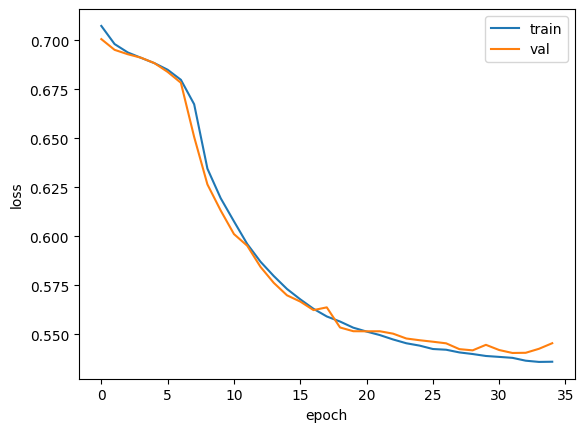

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [26]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 3200000000


원핫인코딩으로 변환했을 때, 입력 데이터가 매우 커지는 문제.

책을 따라 500개 단어로 설정하면 돌아가지도 않음...

## 단어 임베딩을 사용하기

- 단어 임베딩: 순환 신경망에서 텍스트 처리 시 자주 사용하는 방법. 각 단어를 고정된 크기의 실수 벡터로 바꾸어 줌.
- 원-핫 인코딩된 벡터보다 훨씬 의미 있는 값으로 채워져 자연어 처리에서 더 좋은 성능을 내는 경우가 많음
- keras.layers 패키지의 Embedding 클래스로 임베딩 기능 제공
- 입력으로 정수 데이터를 받으므로, 원-핫 인코딩으로 변경된 train_oh 배열이 아닌 train_seq를 사용할 수 있음(=메모리 효율적 사용)
- 원-핫 인코딩과 마찬가지로 샘플을 2차원 배열로 늘리나, 훨씬 작은 크기로도 단어 표현 가능

In [27]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(200, # 어휘 사전 크기
                                  16, # 임베딩 벡터 크기
                                  input_shape=(100,))) # 입력 시퀀스 길이
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 16)        │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 8)              │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,409 (13.32 KB)

 Trainable params: 3,409 (13.32 KB)

 Non-trainable params: 0 (0.00 B)

- (100,) 크기의 입력을 받아 (100, 16) 크기의 출력을 만듦
- Embedding 클래스는 500개의 각 토큰을 크기가 16인 벡터로 변경하므로 총 500*16=8000개의 모델 파라미터 가짐
- SimpleRNN 층은 임베딩 벡터 크기가 16이므로 8개의 뉴런과 곱하기 위해 필요한 가중치 16*8=128개를 가짐
- 은닉 상태에 곱해지는 가중치 8*8=64개
- 8개의 절편
- 이 순환층에 있는 전체 모델 파라미터 개수: $128+64+8=200개$
- Dense 층의 가중치 개수는 이전과 동일하게 9개


In [28]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.5023 - loss: 0.6942 - val_accuracy: 0.4982 - val_loss: 0.6941
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.5089 - loss: 0.6929 - val_accuracy: 0.5120 - val_loss: 0.6934
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5320 - loss: 0.6908 - val_accuracy: 0.5142 - val_loss: 0.6929
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.5308 - loss: 0.6900 - val_accuracy: 0.5186 - val_loss: 0.6926
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.5471 - loss: 0.6881 - val_accuracy: 0.5468 - val_loss: 0.6881
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5937 - loss: 0.6812 - val_accuracy: 0.5916 - val_loss: 0.6804
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.6246 - loss: 0.6731 - val_accuracy: 0.6108 - val_loss: 0.6736
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6458 - loss: 0.664

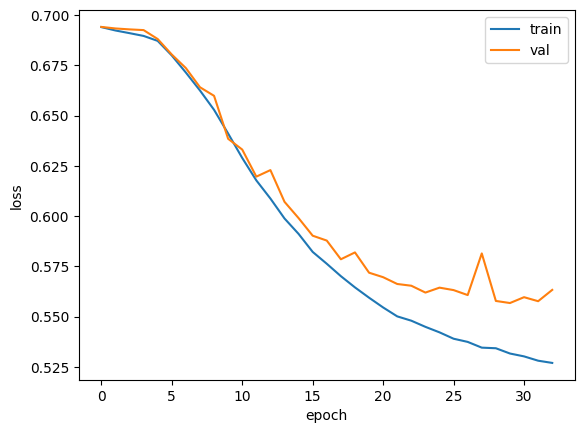

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()